In [1]:
"""
Data Wrangling II
Create an “Academic performance” dataset of students and perform the
following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there
are missing values and/or inconsistencies, use any of the suitable
techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any
of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The
purpose of this transformation should be one of the following
reasons: to change the scale for better understanding of the variable,
to convert a non-linear relation into a linear one, or to decrease the
skewness and convert the distribution into a normal distribution.
"""

'\nData Wrangling II\nCreate an “Academic performance” dataset of students and perform the\nfollowing operations using Python.\n1. Scan all variables for missing values and inconsistencies. If there\nare missing values and/or inconsistencies, use any of the suitable\ntechniques to deal with them.\n2. Scan all numeric variables for outliers. If there are outliers, use any\nof the suitable techniques to deal with them.\n3. Apply data transformations on at least one of the variables. The\npurpose of this transformation should be one of the following\nreasons: to change the scale for better understanding of the variable,\nto convert a non-linear relation into a linear one, or to decrease the\nskewness and convert the distribution into a normal distribution.\n'

In [33]:
import pandas as pd
import numpy as np

# Creating a sample dataset
data = {
    'Student_ID': range(1, 11),
    'Math_Score': [85, 78, np.nan, 90, 88, 76, 95, 110, 60, 82],  # 110 is an outlier
    'Science_Score': [80, 75, 88, 92, np.nan, 79, 85, 78, 55, 100],
    'English_Score': [78, 80, 82, np.nan, 88, 76, 85, 90, 70, 79],
    'Attendance': [95, 88, 92, 85, np.nan, 80, 110, 100, 70, 78],  # 110 is an inconsistency
    'Study_Hours': [5, 6, 4, 3, 7, np.nan, 8, 2, 10, 6]
}

df = pd.DataFrame(data)

df


,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Study_Hours
0,1,85.0,80.0,78.0,95.0,5.0
1,2,78.0,75.0,80.0,88.0,6.0
2,3,NaN,88.0,82.0,92.0,4.0
3,4,90.0,92.0,NaN,85.0,3.0
4,5,88.0,NaN,88.0,NaN,7.0
5,6,76.0,79.0,76.0,80.0,NaN
6,7,95.0,85.0,85.0,110.0,8.0
7,8,110.0,78.0,90.0,100.0,2.0
8,9,60.0,55.0,70.0,70.0,10.0
9,10,82.0,100.0,79.0,78.0,6.0


In [34]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

# Handling missing values:
# - Fill numerical columns with the median of the respective column
df.fillna(df.median(numeric_only=True), inplace=True)

# Display the cleaned dataset
print("\nDataset after handling missing values:")
df


Missing Values in Dataset:
Student_ID       0
Math_Score       1
Science_Score    1
English_Score    1
Attendance       1
Study_Hours      1
dtype: int64

Dataset after handling missing values:


,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Study_Hours
0,1,85.0,80.0,78.0,95.0,5.0
1,2,78.0,75.0,80.0,88.0,6.0
2,3,85.0,88.0,82.0,92.0,4.0
3,4,90.0,92.0,80.0,85.0,3.0
4,5,88.0,80.0,88.0,88.0,7.0
5,6,76.0,79.0,76.0,80.0,6.0
6,7,95.0,85.0,85.0,110.0,8.0
7,8,110.0,78.0,90.0,100.0,2.0
8,9,60.0,55.0,70.0,70.0,10.0
9,10,82.0,100.0,79.0,78.0,6.0


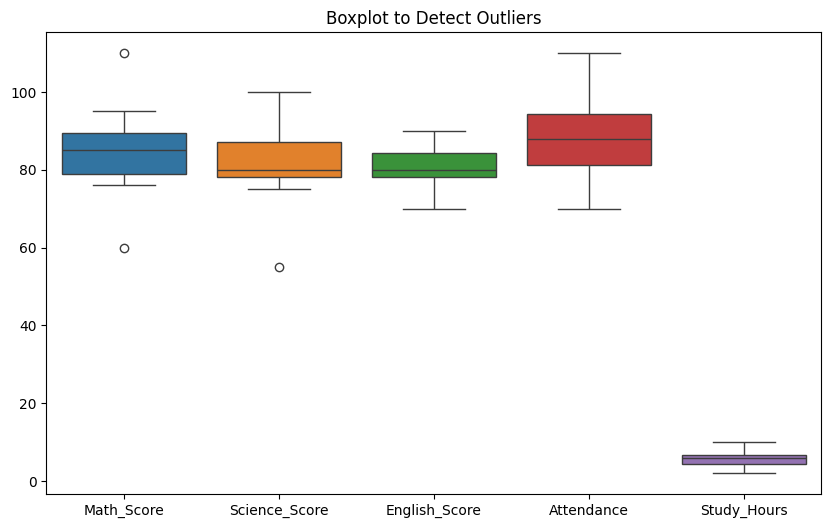

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Math_Score', 'Science_Score', 'English_Score', 'Attendance', 'Study_Hours']])
plt.title("Boxplot to Detect Outliers")
plt.show()


In [40]:
# Handling outliers using the IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1


In [42]:

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [43]:

# Replace outliers with median
for col in ['Math_Score', 'Science_Score', 'English_Score', 'Attendance', 'Study_Hours']:
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), median_value, df[col])

In [45]:

# Display the cleaned dataset
print("\nDataset after handling outliers:")
df


Dataset after handling outliers:


,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Study_Hours
0,1,85.0,80.0,78.0,95.0,5.0
1,2,78.0,75.0,80.0,88.0,6.0
2,3,85.0,88.0,82.0,92.0,4.0
3,4,90.0,92.0,80.0,85.0,3.0
4,5,88.0,80.0,88.0,88.0,7.0
5,6,76.0,79.0,76.0,80.0,6.0
6,7,95.0,85.0,85.0,110.0,8.0
7,8,85.0,78.0,90.0,100.0,2.0
8,9,85.0,80.0,70.0,70.0,10.0
9,10,82.0,100.0,79.0,78.0,6.0


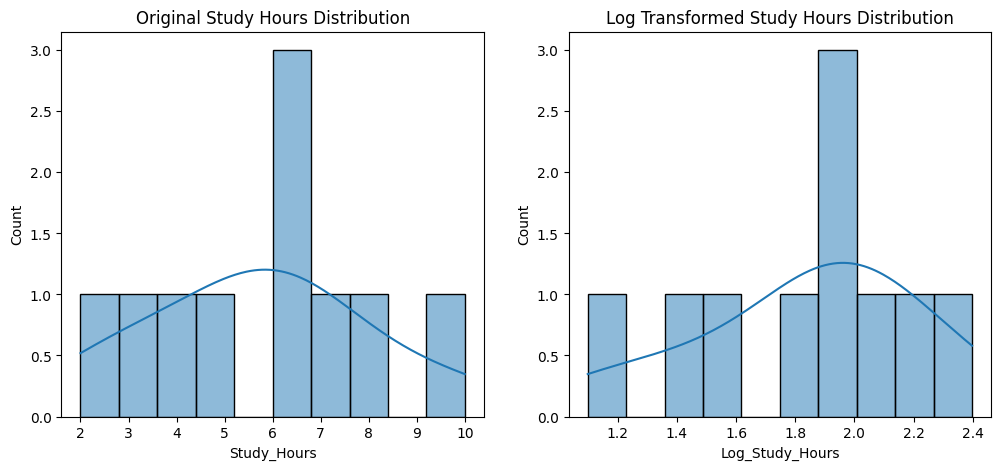

In [46]:
# Apply log transformation to Study_Hours
df['Log_Study_Hours'] = np.log1p(df['Study_Hours'])  # log1p handles zero values safely

# Plot before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Study_Hours'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Original Study Hours Distribution")

sns.histplot(df['Log_Study_Hours'], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Study Hours Distribution")

plt.show()


In [47]:

# Display final dataset
print("\nDataset after transformation:")
print(df)



Dataset after transformation:
   Student_ID  Math_Score  Science_Score  English_Score  Attendance  \
0           1        85.0           80.0           78.0        95.0   
1           2        78.0           75.0           80.0        88.0   
2           3        85.0           88.0           82.0        92.0   
3           4        90.0           92.0           80.0        85.0   
4           5        88.0           80.0           88.0        88.0   
5           6        76.0           79.0           76.0        80.0   
6           7        95.0           85.0           85.0       110.0   
7           8        85.0           78.0           90.0       100.0   
8           9        85.0           80.0           70.0        70.0   
9          10        82.0          100.0           79.0        78.0   

   Study_Hours  Log_Study_Hours  
0          5.0         1.791759  
1          6.0         1.945910  
2          4.0         1.609438  
3          3.0         1.386294  
4          7.0   

In [61]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Study_Hours,Log_Study_Hours
0,1,85.0,80.0,78.0,95.0,5.0,1.791759
1,2,78.0,75.0,80.0,88.0,6.0,1.945910
2,3,85.0,88.0,82.0,92.0,4.0,1.609438
3,4,90.0,92.0,80.0,85.0,3.0,1.386294
4,5,88.0,80.0,88.0,88.0,7.0,2.079442
5,6,76.0,79.0,76.0,80.0,6.0,1.945910
6,7,95.0,85.0,85.0,110.0,8.0,2.197225
7,8,85.0,78.0,90.0,100.0,2.0,1.098612
8,9,85.0,80.0,70.0,70.0,10.0,2.397895
9,10,82.0,100.0,79.0,78.0,6.0,1.945910
